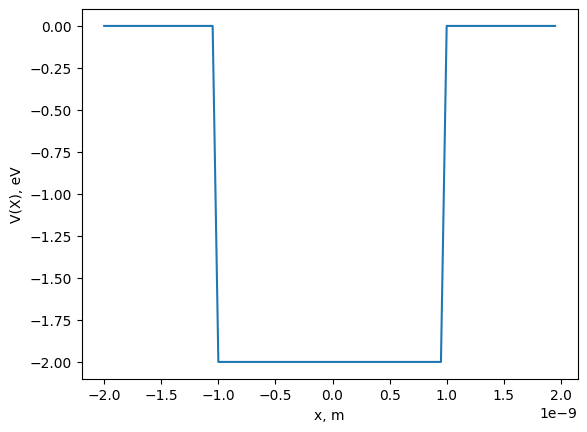

Энергитические уровни ямы (En):
-1.927621601445522
-1.7120877499367853
-1.3588335767195328
-0.8800905669686161
-0.30868073313296207


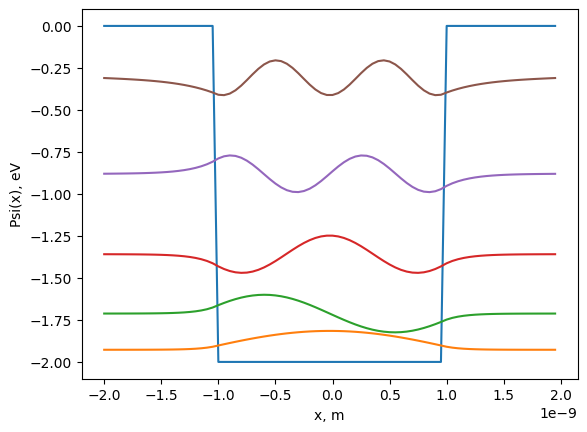

In [74]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import cmath
from scipy.optimize import fsolve
from numpy import linalg as LA
import matplotlib.image as mpimg

hbar = 1.055e-34     # постоянная планка
m0 = 9.1e-31         # масса электрона
m = 1*m0             # масса электрона (коэффицент)
eV2J = 1.6e-19       # константа для перевода энергии в H
J2eV = 1/eV2J        # обратная контанта для перевода энергии
wheigth= -2          # глубина ямы в eV
a=1e-9               # размер в м (яма от -а до а)

# дискретизация интервала
dx = .05e-9;         # шаг дискретизации в м
xleft=-2*a
xright=2*a
xa=np.arange(xleft, xright, dx)
Vxa=np.zeros(len(xa))

def potentialwell(x,a,V):
  if x<=-a:
    return 0
  elif x<=a:
    return V
  else:
    return 0

for i in range(len(xa)):
  Vxa[i]=potentialwell(xa[i],a,wheigth*eV2J)

plt.figure()
plt.plot(xa,Vxa * J2eV)
plt.xlabel("x, m")
plt.ylabel("V(X), eV")
plt.show()

ra = (0.5*hbar**2/m)/(dx**2)  # Коэффициент перед кинетической энергией в гамильтониане
#Вычисление значений энергитических уровней потенциальной ямы используя конечно-разностную аппроксимацию.
nx=len(xa)
#Кинетическая часть оператора гамельтониана содержит вторую производную, которая апроксимируется методом конечных разностей.
#Cоответствующий дискретный оператор записывается в виде матрицы.
#Трех диагональная матрица (-1*ra/dx**2; 2*ra/dx**2 + Vxa; -1*ra/dx**2)
Ham=-np.diag(ra*np.ones(nx-1),-1)+np.diag(2*ra*np.ones(nx)+Vxa,0)-np.diag(ra*np.ones(nx-1),1)
#Собственные значения и собственные вектора матрицы соответствуют уровням энергии En и дискретизированным волновым функциям ψn(x)
eigenvalues, eigenvectors = LA.eig(Ham)
#Значения меньше 0
print('Энергитические уровни ямы (En):')
for value in sorted(eigenvalues * J2eV):
    if value < 0:
        print(value)

#Сортировка собственных значений по возрастанию
idx = eigenvalues.argsort()
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

ndx=0.12/math.sqrt(dx*1e9)
plt.figure()
plt.plot(xa,J2eV*Vxa)
for i in range(len(eigenvalues)):
    if J2eV*eigenvalues[i] < 0:
        if i == 0:
            plt.plot(xa,np.abs(eigenvectors[:,i])*ndx+J2eV*eigenvalues[i])
        else:
            plt.plot(xa,eigenvectors[:,i]*ndx+J2eV*eigenvalues[i])
plt.xlabel("x, m")
plt.ylabel("Psi(x), eV")
plt.show()

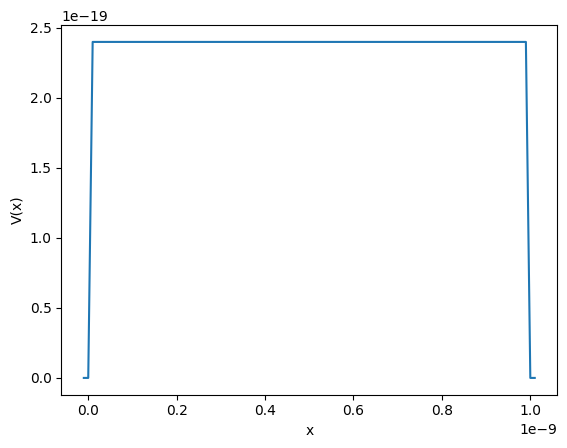

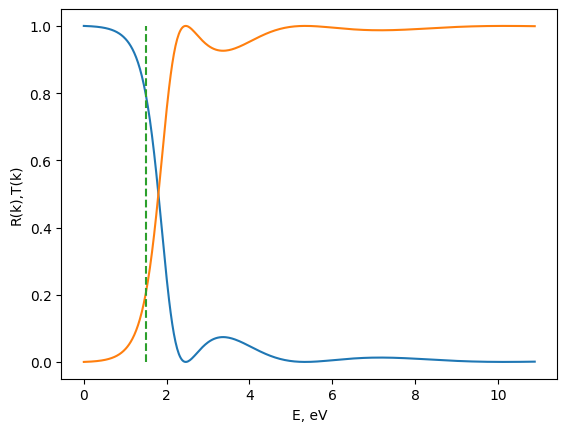

In [44]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import cmath
from scipy.optimize import fsolve
from numpy import linalg as LA
import matplotlib.image as mpimg

Vb=1.5*eV2J #высота барьера
a=1*1e-9 #ширина барьера
# дискретизация интервала
dx=0.01*1e-9
xleft=-dx
xright=a+2*dx
xa=np.arange(xleft, xright, dx)

def rectpotentialbarrier(x,a,V):
  if x<=0:
    return 0
  elif x<a:
    return V
  else:
    return 0

Vbxa=np.zeros(len(xa))

for i in range(len(xa)):
  Vbxa[i]=rectpotentialbarrier(xa[i],a,Vb)

plt.figure()
plt.plot(xa,Vbxa)
plt.xlabel("x")
plt.ylabel("V(x)")
plt.show()

eV2J = 1.6e-19  # константа для перевода энергии в H
J2eV = 1/eV2J   # обратная контанта для перевода энергии
kmin=0
kmax=math.sqrt(2*m*Vb)/hbar
nk=500
dk=2.7*kmax/nk
ka=np.arange(dk,2.7*kmax, dk)

Ea=[k**2*hbar**2/(2*m) for k in ka]
EaJ=[J2eV*k**2*hbar**2/(2*m) for k in ka]

#Массивы коэффицентов прохождения и отраженния соотвественно
Tka=np.zeros(len(ka))
Rka=np.zeros(len(ka))

#Численный метод для решения одномерного станционарного уравнения Шреденгера 
#Перебор всех значений волнового числа из массива ka которые соответствуют определенной энергии
for l in range(len(ka)):
    #Инициализация волновой функции пси
    Psitempxa=np.zeros(len(xa),dtype=complex)
    k=ka[l]
    #На начальных точках значение волновой функции задается как плоская волна e^-ikx
    Psitempxa[0]=cmath.exp(-1j*k*xa[0])
    Psitempxa[1]=cmath.exp(-1j*k*xa[1])

    #Находим численное решение внутри барьера при заданной энергии падающей справа волны и
    #Начальных данных справа от барьера в виде прошедшей плоской волны единичной амплитуды
    for i in range(len(xa)-2):
        #Рекурентное построение на основе конечной разности используя два предыдущих значения (формула основана на апроксимации второй производной уравнения Шреденгера)
        Psitempxa[i+2]=2*Psitempxa[i+1]-Psitempxa[i]-dx**2*(k**2-2*m*Vbxa[i+1]/hbar**2)*Psitempxa[i+1]
    #Строится матрица перехода T^-1, которая связывает аплитуды падающей и прошедшей волн через значение волновой функции и ее значения на правом краю сетки
    invT=(0.5/math.sin(k*dx))*1j*np.array([[-cmath.exp(1j*k*xa[-1]),cmath.exp(1j*k*xa[-2])],[cmath.exp(-1j*k*xa[-1]),-cmath.exp(-1j*k*xa[-2])]],dtype=complex)
    #Сохранение значений волновой функции на двух послених точках сетки
    psiin=np.array([Psitempxa[-2],Psitempxa[-1]],dtype=complex)
    #Амплитуда падающей и отраженной волны
    ab=np.matmul(invT,psiin)
    #Вычисление коэфициентов отражения и прохождения R и T (отношения итенсивностей отраженности/прошедшей и падающей волный)
    Rka[l]=np.abs(ab[1]**2/ab[0]**2)
    Tka[l]=np.abs(1/ab[0]**2)

plt.figure()
plt.plot(EaJ,Rka)
plt.plot(EaJ,Tka)
plt.plot([Vb*J2eV,Vb*J2eV],[0,1],'--')
plt.xlabel("E, eV")
plt.ylabel("R(k),T(k)")
plt.show()
